# Depression Detection in reddit text

In [ ]:

import nltk  # for text manipulation 
import string # for text manipulation 
import warnings 
import numpy as np 
import pandas as pd # for data manipulation 
import matplotlib.pyplot as plt
import re
from textblob import TextBlob

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore") #ignore warnings

# Data Preparation

In [ ]:

df = pd.read_csv("./paper_sdata/reddit.csv")
df.head()

,Unnamed: 0,text,class
0,2,"Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her. As of a few days ago, she be...",suicide
1,3,Am I weird I don't get affected by compliments if it's coming from someone I know irl but I feel really good when internet strangers do it,non-suicide
2,4,"Finally 2020 is almost over... So I can never hear ""2020 has been a bad year"" ever again. I swear to fucking God it's so annoying",non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’ve been struggling for years and I’m afraid. Through these past years thoughts of suicide, fear, anxiety I’m so close to my limit . I’ve been quiet for...",suicide


In [ ]:
df.shape

(232074, 3)

In [ ]:
df.drop(['Unnamed: 0'],axis = 1,inplace = True)
df.head()

,text,class
0,"Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her. As of a few days ago, she be...",suicide
1,Am I weird I don't get affected by compliments if it's coming from someone I know irl but I feel really good when internet strangers do it,non-suicide
2,"Finally 2020 is almost over... So I can never hear ""2020 has been a bad year"" ever again. I swear to fucking God it's so annoying",non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’ve been struggling for years and I’m afraid. Through these past years thoughts of suicide, fear, anxiety I’m so close to my limit . I’ve been quiet for...",suicide


# Data Cleaning

In [ ]:

df['Clean_TweetText'] = df['text'].str.replace("@", "") 
df.head()

,text,class,Clean_TweetText
0,"Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her. As of a few days ago, she be...",suicide,"Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her. As of a few days ago, she be..."
1,Am I weird I don't get affected by compliments if it's coming from someone I know irl but I feel really good when internet strangers do it,non-suicide,Am I weird I don't get affected by compliments if it's coming from someone I know irl but I feel really good when internet strangers do it
2,"Finally 2020 is almost over... So I can never hear ""2020 has been a bad year"" ever again. I swear to fucking God it's so annoying",non-suicide,"Finally 2020 is almost over... So I can never hear ""2020 has been a bad year"" ever again. I swear to fucking God it's so annoying"
3,i need helpjust help me im crying so hard,suicide,i need helpjust help me im crying so hard
4,"I’m so lostHello, my name is Adam (16) and I’ve been struggling for years and I’m afraid. Through these past years thoughts of suicide, fear, anxiety I’m so close to my limit . I’ve been quiet for...",suicide,"I’m so lostHello, my name is Adam (16) and I’ve been struggling for years and I’m afraid. Through these past years thoughts of suicide, fear, anxiety I’m so close to my limit . I’ve been quiet for..."


In [ ]:

df['Clean_TweetText'] = df['Clean_TweetText'].str.replace(r"http\S+", "") 
df.head()

,text,class,Clean_TweetText
0,"Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her. As of a few days ago, she be...",suicide,"Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her. As of a few days ago, she be..."
1,Am I weird I don't get affected by compliments if it's coming from someone I know irl but I feel really good when internet strangers do it,non-suicide,Am I weird I don't get affected by compliments if it's coming from someone I know irl but I feel really good when internet strangers do it
2,"Finally 2020 is almost over... So I can never hear ""2020 has been a bad year"" ever again. I swear to fucking God it's so annoying",non-suicide,"Finally 2020 is almost over... So I can never hear ""2020 has been a bad year"" ever again. I swear to fucking God it's so annoying"
3,i need helpjust help me im crying so hard,suicide,i need helpjust help me im crying so hard
4,"I’m so lostHello, my name is Adam (16) and I’ve been struggling for years and I’m afraid. Through these past years thoughts of suicide, fear, anxiety I’m so close to my limit . I’ve been quiet for...",suicide,"I’m so lostHello, my name is Adam (16) and I’ve been struggling for years and I’m afraid. Through these past years thoughts of suicide, fear, anxiety I’m so close to my limit . I’ve been quiet for..."


In [ ]:
df['Clean_TweetText'] = df['Clean_TweetText'].str.replace("[^a-zA-Z]", " ") 
df.head()

,text,class,Clean_TweetText
0,"Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her. As of a few days ago, she be...",suicide,Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her As of a few days ago she be...
1,Am I weird I don't get affected by compliments if it's coming from someone I know irl but I feel really good when internet strangers do it,non-suicide,Am I weird I don t get affected by compliments if it s coming from someone I know irl but I feel really good when internet strangers do it
2,"Finally 2020 is almost over... So I can never hear ""2020 has been a bad year"" ever again. I swear to fucking God it's so annoying",non-suicide,Finally is almost over So I can never hear has been a bad year ever again I swear to fucking God it s so annoying
3,i need helpjust help me im crying so hard,suicide,i need helpjust help me im crying so hard
4,"I’m so lostHello, my name is Adam (16) and I’ve been struggling for years and I’m afraid. Through these past years thoughts of suicide, fear, anxiety I’m so close to my limit . I’ve been quiet for...",suicide,I m so lostHello my name is Adam and I ve been struggling for years and I m afraid Through these past years thoughts of suicide fear anxiety I m so close to my limit I ve been quiet for...


In [ ]:
df1=df.dropna()
df1.drop(['text'],axis = 1,inplace = True)
df1.head()

,class,Clean_TweetText
0,suicide,Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her As of a few days ago she be...
1,non-suicide,Am I weird I don t get affected by compliments if it s coming from someone I know irl but I feel really good when internet strangers do it
2,non-suicide,Finally is almost over So I can never hear has been a bad year ever again I swear to fucking God it s so annoying
3,suicide,i need helpjust help me im crying so hard
4,suicide,I m so lostHello my name is Adam and I ve been struggling for years and I m afraid Through these past years thoughts of suicide fear anxiety I m so close to my limit I ve been quiet for...


In [ ]:
df1.shape

(232074, 2)

In [ ]:
import nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [ ]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [ ]:
df1['Clean_TweetText'] = df1['Clean_TweetText'].apply(lambda text : remove_stopwords(text.lower()))
df1.head()

,class,Clean_TweetText
0,suicide,ex wife threatening suiciderecently left wife good cheated twice lied much decided refuse go back days ago began threatening suicide tirelessly spent paat days talking keeps hesitating wants belie...
1,non-suicide,weird get affected compliments coming someone know irl feel really good internet strangers
2,non-suicide,finally almost never hear bad year ever swear fucking god annoying
3,suicide,need helpjust help im crying hard
4,suicide,losthello name adam struggling years afraid past years thoughts suicide fear anxiety close limit quiet long scared come family feelings years ago losing aunt triggered everyday feeling hopeless lo...


In [ ]:
df1['Clean_TweetText'] = df1['Clean_TweetText'].apply(lambda x: x.split())
df1.head()

,class,Clean_TweetText
0,suicide,"[ex, wife, threatening, suiciderecently, left, wife, good, cheated, twice, lied, much, decided, refuse, go, back, days, ago, began, threatening, suicide, tirelessly, spent, paat, days, talking, ke..."
1,non-suicide,"[weird, get, affected, compliments, coming, someone, know, irl, feel, really, good, internet, strangers]"
2,non-suicide,"[finally, almost, never, hear, bad, year, ever, swear, fucking, god, annoying]"
3,suicide,"[need, helpjust, help, im, crying, hard]"
4,suicide,"[losthello, name, adam, struggling, years, afraid, past, years, thoughts, suicide, fear, anxiety, close, limit, quiet, long, scared, come, family, feelings, years, ago, losing, aunt, triggered, ev..."


In [ ]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
df1['Clean_TweetText'] = df1['Clean_TweetText'].apply(lambda x: [stemmer.stem(i) for i in x])
df1.head()

,class,Clean_TweetText
0,suicide,"[ex, wife, threaten, suiciderec, left, wife, good, cheat, twice, lie, much, decid, refus, go, back, day, ago, began, threaten, suicid, tirelessli, spent, paat, day, talk, keep, hesit, want, believ..."
1,non-suicide,"[weird, get, affect, compliment, come, someon, know, irl, feel, realli, good, internet, stranger]"
2,non-suicide,"[final, almost, never, hear, bad, year, ever, swear, fuck, god, annoy]"
3,suicide,"[need, helpjust, help, im, cri, hard]"
4,suicide,"[losthello, name, adam, struggl, year, afraid, past, year, thought, suicid, fear, anxieti, close, limit, quiet, long, scare, come, famili, feel, year, ago, lose, aunt, trigger, everyday, feel, hop..."


In [ ]:
df1['Clean_TweetText'] = df1['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x]))
df1.head()

,class,Clean_TweetText
0,suicide,ex wife threaten suiciderec left wife good cheat twice lie much decid refus go back day ago began threaten suicid tirelessli spent paat day talk keep hesit want believ come back know lot peopl thr...
1,non-suicide,weird get affect compliment come someon know irl feel realli good internet stranger
2,non-suicide,final almost never hear bad year ever swear fuck god annoy
3,suicide,need helpjust help im cri hard
4,suicide,losthello name adam struggl year afraid past year thought suicid fear anxieti close limit quiet long scare come famili feel year ago lose aunt trigger everyday feel hopeless lost guilti remors thi...


In [ ]:
df1['Clean_TweetText'] = df1['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df1.head()

,class,Clean_TweetText
0,suicide,wife threaten suiciderec left wife good cheat twice much decid refus back began threaten suicid tirelessli spent paat talk keep hesit want believ come back know peopl threaten order happen realli ...
1,non-suicide,weird affect compliment come someon know feel realli good internet stranger
2,non-suicide,final almost never hear year ever swear fuck annoy
3,suicide,need helpjust help hard
4,suicide,losthello name adam struggl year afraid past year thought suicid fear anxieti close limit quiet long scare come famili feel year lose aunt trigger everyday feel hopeless lost guilti remors thing d...


In [ ]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 2.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data Visualization

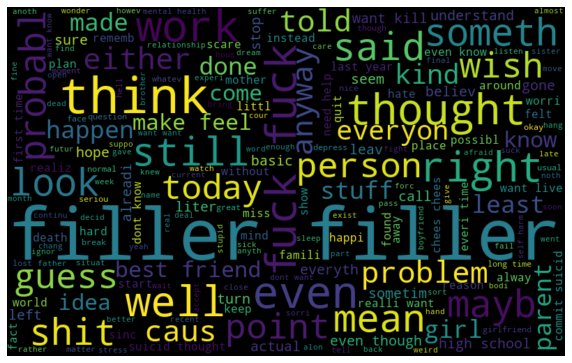

In [ ]:
all_words = ' '.join([text for text in df1['Clean_TweetText']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()


# Sentiment Analysis

In [ ]:
df1['class'] = df1['class'].replace(['non-suicide','suicide'],[0,1])

In [ ]:
df1['class'].value_counts()

1    116037
0    116037
Name: class, dtype: int64

*here 0 means depressive tweets, 1 means neutral tweets and 2 means positive tweets*

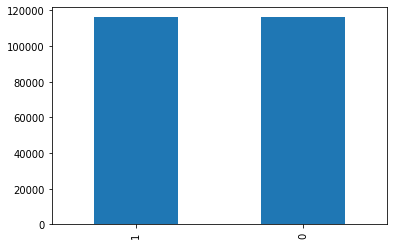

In [ ]:
# Plotting
df1['class'].value_counts().plot(kind = 'bar')
plt.show()

# Word Clouds

word cloud for positive words

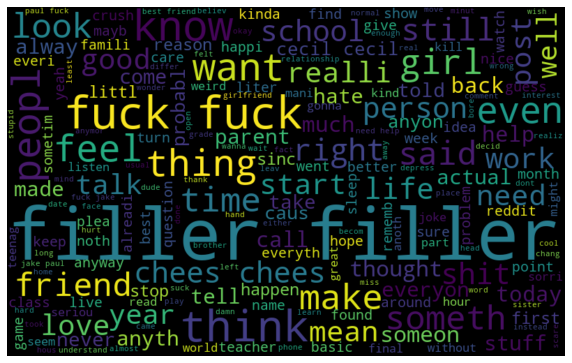

In [ ]:
positive_words =' '.join([text for text in df1['Clean_TweetText'][df1['class'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

word cloud for depressive words

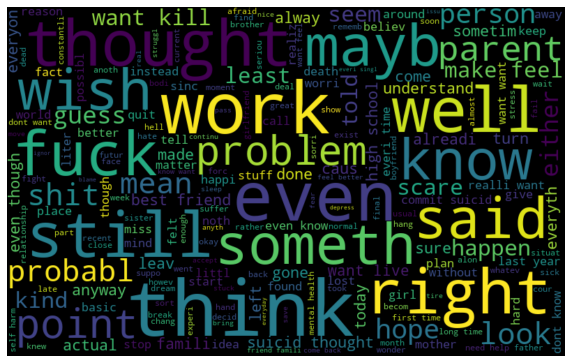

In [ ]:
depressive_words =' '.join([text for text in df1['Clean_TweetText'][df1['class'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(depressive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

# Model Building

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english') 
cv = count_vectorizer.fit_transform(df1['Clean_TweetText'])
cv.shape

(232074, 101831)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(cv,df1['class'] , test_size=.2,stratify=df1['class'], random_state=42)

# MODEL TRAINING

# XGBoost Classifier

In [ ]:
xgbc = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 2)
xgbc.fit(X_train,y_train)
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(prediction_xgb,y_test))

0.92672627383389


In [ ]:
!pip install metrics

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 841.7/841.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for metrics: filename=metrics-0.3.3-py2.py3-none-any.whl size=17816 sha256=c4eb5fa389d523ea55930b6bdc898c350f09894798eac77c86457ab019c3d814
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\29\7a\e7\1175d9ff10607b8f02aa37c32392cb28cdda0aea8fcc2b514b
  Created wheel for pathspec: filename=pathspec-0.5.5-py3-none-any.whl size=24234 sha256=aee36987da6c51f1f3d212173a1625c0d90e17146edcc4469166c4b5744e3b75
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\28\d4\11\01ccd690e97b06874998aa554a8b2610c361900d2a7e038300
Successfully built metrics pathspec
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.12.0
    Uninstalling Pygments-2.12.0:
  

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
rich 12.4.4 requires pygments<3.0.0,>=2.6.0, but you have pygments 2.2.0 which is incompatible.
nbconvert 6.5.0 requires pygments>=2.4.1, but you have pygments 2.2.0 which is incompatible.
ipython 8.4.0 requires pygments>=2.4.0, but you have pygments 2.2.0 which is incompatible.

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,prediction_xgb))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93     23208
           1       0.94      0.91      0.93     23207

    accuracy                           0.93     46415
   macro avg       0.93      0.93      0.93     46415
weighted avg       0.93      0.93      0.93     46415



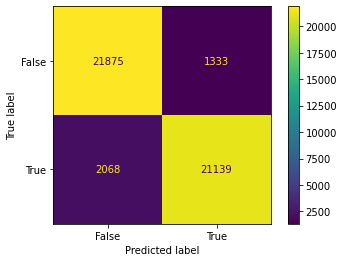

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test,prediction_xgb)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False, True])
cm_display.plot()
plt.show()

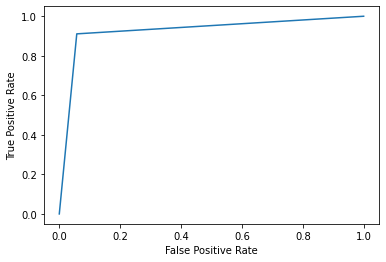

In [ ]:
fpr,tpr,_=metrics.roc_curve(y_test,prediction_xgb)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

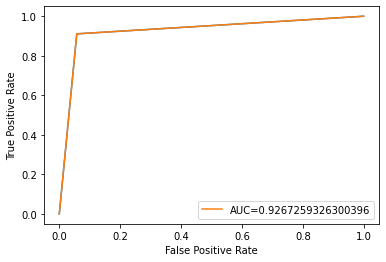

In [ ]:
auc=metrics.roc_auc_score(y_test,prediction_xgb)
plt.plot(fpr,tpr)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train,y_train)
prediction_rf = rf.predict(X_test)
print(accuracy_score(prediction_rf,y_test))

0.8991920715286007


In [ ]:
print(metrics.classification_report(y_test,prediction_rf))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90     23208
           1       0.89      0.92      0.90     23207

    accuracy                           0.90     46415
   macro avg       0.90      0.90      0.90     46415
weighted avg       0.90      0.90      0.90     46415



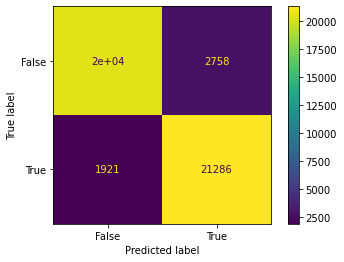

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test,prediction_rf)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False, True])
cm_display.plot()
plt.show()

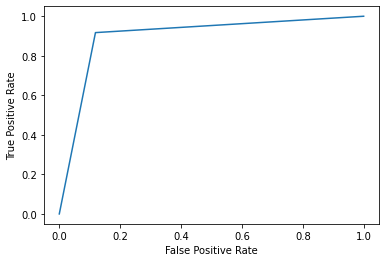

In [ ]:
fpr,tpr,_=metrics.roc_curve(y_test,prediction_rf)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

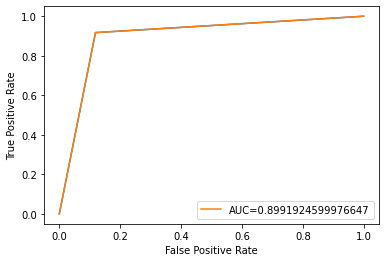

In [ ]:
auc=metrics.roc_auc_score(y_test,prediction_rf)
plt.plot(fpr,tpr)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
prediction_lr = lr.predict(X_test)
print(accuracy_score(prediction_lr,y_test))

0.9219864268016805


In [ ]:
print(metrics.classification_report(y_test,prediction_lr))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     23208
           1       0.94      0.90      0.92     23207

    accuracy                           0.92     46415
   macro avg       0.92      0.92      0.92     46415
weighted avg       0.92      0.92      0.92     46415



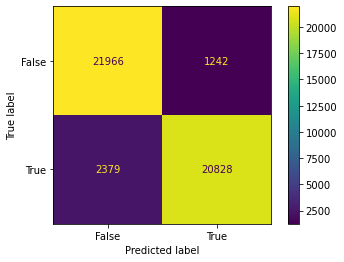

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test,prediction_lr)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False, True])
cm_display.plot()
plt.show()

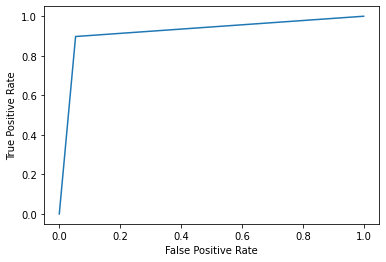

In [ ]:
fpr,tpr,_=metrics.roc_curve(y_test,prediction_lr)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

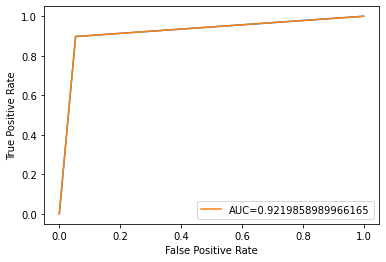

In [ ]:
auc=metrics.roc_auc_score(y_test,prediction_lr)
plt.plot(fpr,tpr)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Support Vector Machines (SVM)

In [ ]:
svc = svm.SVC()
svc.fit(X_train,y_train)
prediction_svc = svc.predict(X_test)
print(accuracy_score(prediction_svc,y_test))

0.9122697403856512


In [ ]:
print(metrics.classification_report(y_test,prediction_svc))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     23208
           1       0.94      0.88      0.91     23207

    accuracy                           0.91     46415
   macro avg       0.91      0.91      0.91     46415
weighted avg       0.91      0.91      0.91     46415



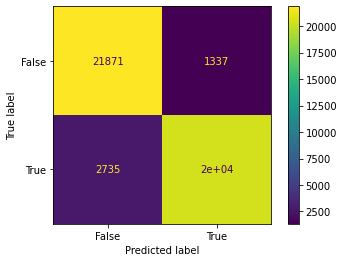

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test,prediction_svc)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False, True])
cm_display.plot()
plt.show()

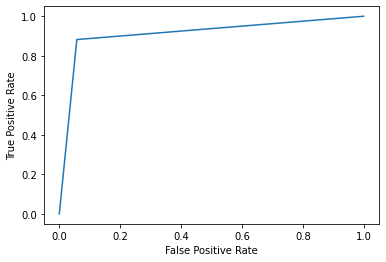

In [ ]:
fpr,tpr,_=metrics.roc_curve(y_test,prediction_svc)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

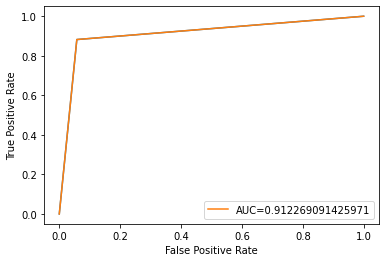

In [ ]:
auc=metrics.roc_auc_score(y_test,prediction_svc)
plt.plot(fpr,tpr)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()